## **1. Unsupervised Learning**

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [36]:
# Import file CSV dari File Explorer
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [37]:
data = pd.read_csv("data.csv", index_col = 0)
data

,NUC,MIT,ME3,ME2,ME1,EXC,VAC,POX
CYT,,,,,,,,
ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
YUR1_YEAST,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22
ZIP1_YEAST,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47
ZNRP_YEAST,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1484 entries, ADT1_YEAST to G6PD_YEAST
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NUC     1484 non-null   float64
 1   MIT     1484 non-null   float64
 2   ME3     1484 non-null   float64
 3   ME2     1484 non-null   float64
 4   ME1     1484 non-null   float64
 5   EXC     1484 non-null   float64
 6   VAC     1484 non-null   float64
 7   POX     1484 non-null   float64
dtypes: float64(8)
memory usage: 104.3+ KB


In [39]:
np.sum(data.isnull())

NUC    0
MIT    0
ME3    0
ME2    0
ME1    0
EXC    0
VAC    0
POX    0
dtype: int64

In [40]:
minmax_form = preprocessing.MinMaxScaler(feature_range = (0,1))
normalized_data = minmax_form.fit_transform(data)

normalized_data

array([[0.52808989, 0.55172414, 0.32911392, ..., 0.        , 0.65753425,
        0.22      ],
       [0.35955056, 0.62068966, 0.34177215, ..., 0.        , 0.7260274 ,
        0.22      ],
       [0.59550562, 0.56321839, 0.35443038, ..., 0.        , 0.7260274 ,
        0.22      ],
       ...,
       [0.62921348, 0.50574713, 0.18987342, ..., 0.        , 0.76712329,
        0.22      ],
       [0.35955056, 0.31034483, 0.49367089, ..., 0.        , 0.7260274 ,
        0.39      ],
       [0.60674157, 0.47126437, 0.41772152, ..., 0.        , 0.7260274 ,
        0.22      ]])

**Sebelum normalisasi**

In [41]:
sum_of_squared_distances = {}
range_n_clusters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_cluster in range_n_clusters:
    model = KMeans(n_clusters = n_cluster,
                  init = 'random',
                  n_init = 10,
                  random_state = 0)
    
    # proses training
    model.fit(data)
    
    sum_of_squared_distances[n_cluster] = model.inertia_

In [42]:
sum_of_squared_distances

{1: 123.4778340296496,
 2: 95.83095720569963,
 3: 80.64438796890656,
 4: 71.3149874223275,
 5: 64.14330969070951,
 6: 60.4001549440687,
 7: 57.91111761625869,
 8: 50.024415164634924,
 9: 47.894355666344445,
 10: 45.789603155247626}

**Setelah normalisasi**

In [43]:
sum_of_squared_distances = {}
range_n_clusters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_cluster in range_n_clusters:
    model = KMeans(n_clusters = n_cluster,
                  init = 'random',
                  n_init = 10,
                  random_state = 0)
    
    # proses training
    model.fit(normalized_data)
    
    sum_of_squared_distances[n_cluster] = model.inertia_

In [44]:
sum_of_squared_distances

{1: 163.4189553809265,
 2: 129.61662574291807,
 3: 113.15931800010388,
 4: 102.45409738722212,
 5: 89.6964290897852,
 6: 83.0800946131784,
 7: 75.68067236318825,
 8: 64.07604764413196,
 9: 61.14546457113885,
 10: 58.35553153053896}

**Evaluasi dengan SILHOUETTE SCORE**

In [45]:
sil = {}
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_cluster in range_n_clusters:
    clusterer = KMeans(n_clusters = n_cluster,
                      init = 'random',
                      n_init = 10,
                      random_state = 0)
    
    preds = clusterer.fit_predict(normalized_data)
    score = silhouette_score(data, preds, metric = "euclidean")
    
    sil[n_cluster] = score

In [46]:
for n_cluster, sil_score in sil.items():
    print(n_cluster, ":", sil_score)

2 : 0.2530413099589995
3 : 0.26667561069670725
4 : 0.1949534453599674
5 : 0.19824308834016355
6 : 0.1903027037717718
7 : 0.2049889275482884
8 : 0.21419033787784597
9 : 0.18312684449090924
10 : 0.18385991547596778


**Proses akhir dan di dapatkan ada 2 CLUSTER**

In [47]:
kmins = KMeans(n_clusters = 2, 
              init = 'random',
              n_init = 10,
              random_state = 0)

kmins.fit(data)
y_kmins = kmins.predict(data)

In [48]:
kmins_df = pd.DataFrame(y_kmins, columns = ['CLUSTER'])
kmins_df

,CLUSTER
0,0
1,1
2,1
3,0
4,1
...,...
1479,1
1480,0
1481,1
1482,0


In [49]:
data['CLUSTER'] = y_kmins
data

,NUC,MIT,ME3,ME2,ME1,EXC,VAC,POX,CLUSTER
CYT,,,,,,,,,
ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,0
ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,1
ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,1
AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,0
AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,1
...,...,...,...,...,...,...,...,...,...
YUR1_YEAST,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,1
ZIP1_YEAST,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,0
ZNRP_YEAST,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,1


In [50]:
from seaborn import pairplot

In [51]:
pairplot(data, hue = 'CLUSTER')

Output hidden; open in https://colab.research.google.com to view.

# **2. Supervised Learning**

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [53]:
knn = KNeighborsClassifier()

x_train, x_test, y_train, y_test = train_test_split(data[data.columns[:-1]],
                                                    data['CLUSTER'],
                                                    test_size = 0.2)

In [54]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [55]:
hasil_prediksi = knn.predict(x_test)

print(classification_report(hasil_prediksi, y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       208
           1       0.93      0.97      0.95        89

    accuracy                           0.97       297
   macro avg       0.96      0.97      0.96       297
weighted avg       0.97      0.97      0.97       297



In [56]:
print(hasil_prediksi)
print(y_test.tolist())

[0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1
 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0
 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0
 1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

## **3. Data Storytelling**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno

from warnings import filterwarnings
filterwarnings("ignore")

Atur konvigurasi matplotlib

In [2]:
plt.rc('font', size = 12)
plt.rc('axes', titlesize = 14)
plt.rc('axes', labelsize = 12)
plt.rc('xtick', labelsize = 12)
plt.rc('ytick', labelsize = 12)
plt.rc('legend', fontsize = 12)
plt.rc('figure', titlesize = 12)

plt.rcParams['figure.dpi'] = 300
sns.set_style('whitegrid')

In [3]:
# Import file CSV dari File Explorer
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [4]:
netflix = pd.read_csv("netflix_titles.csv")
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [6]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


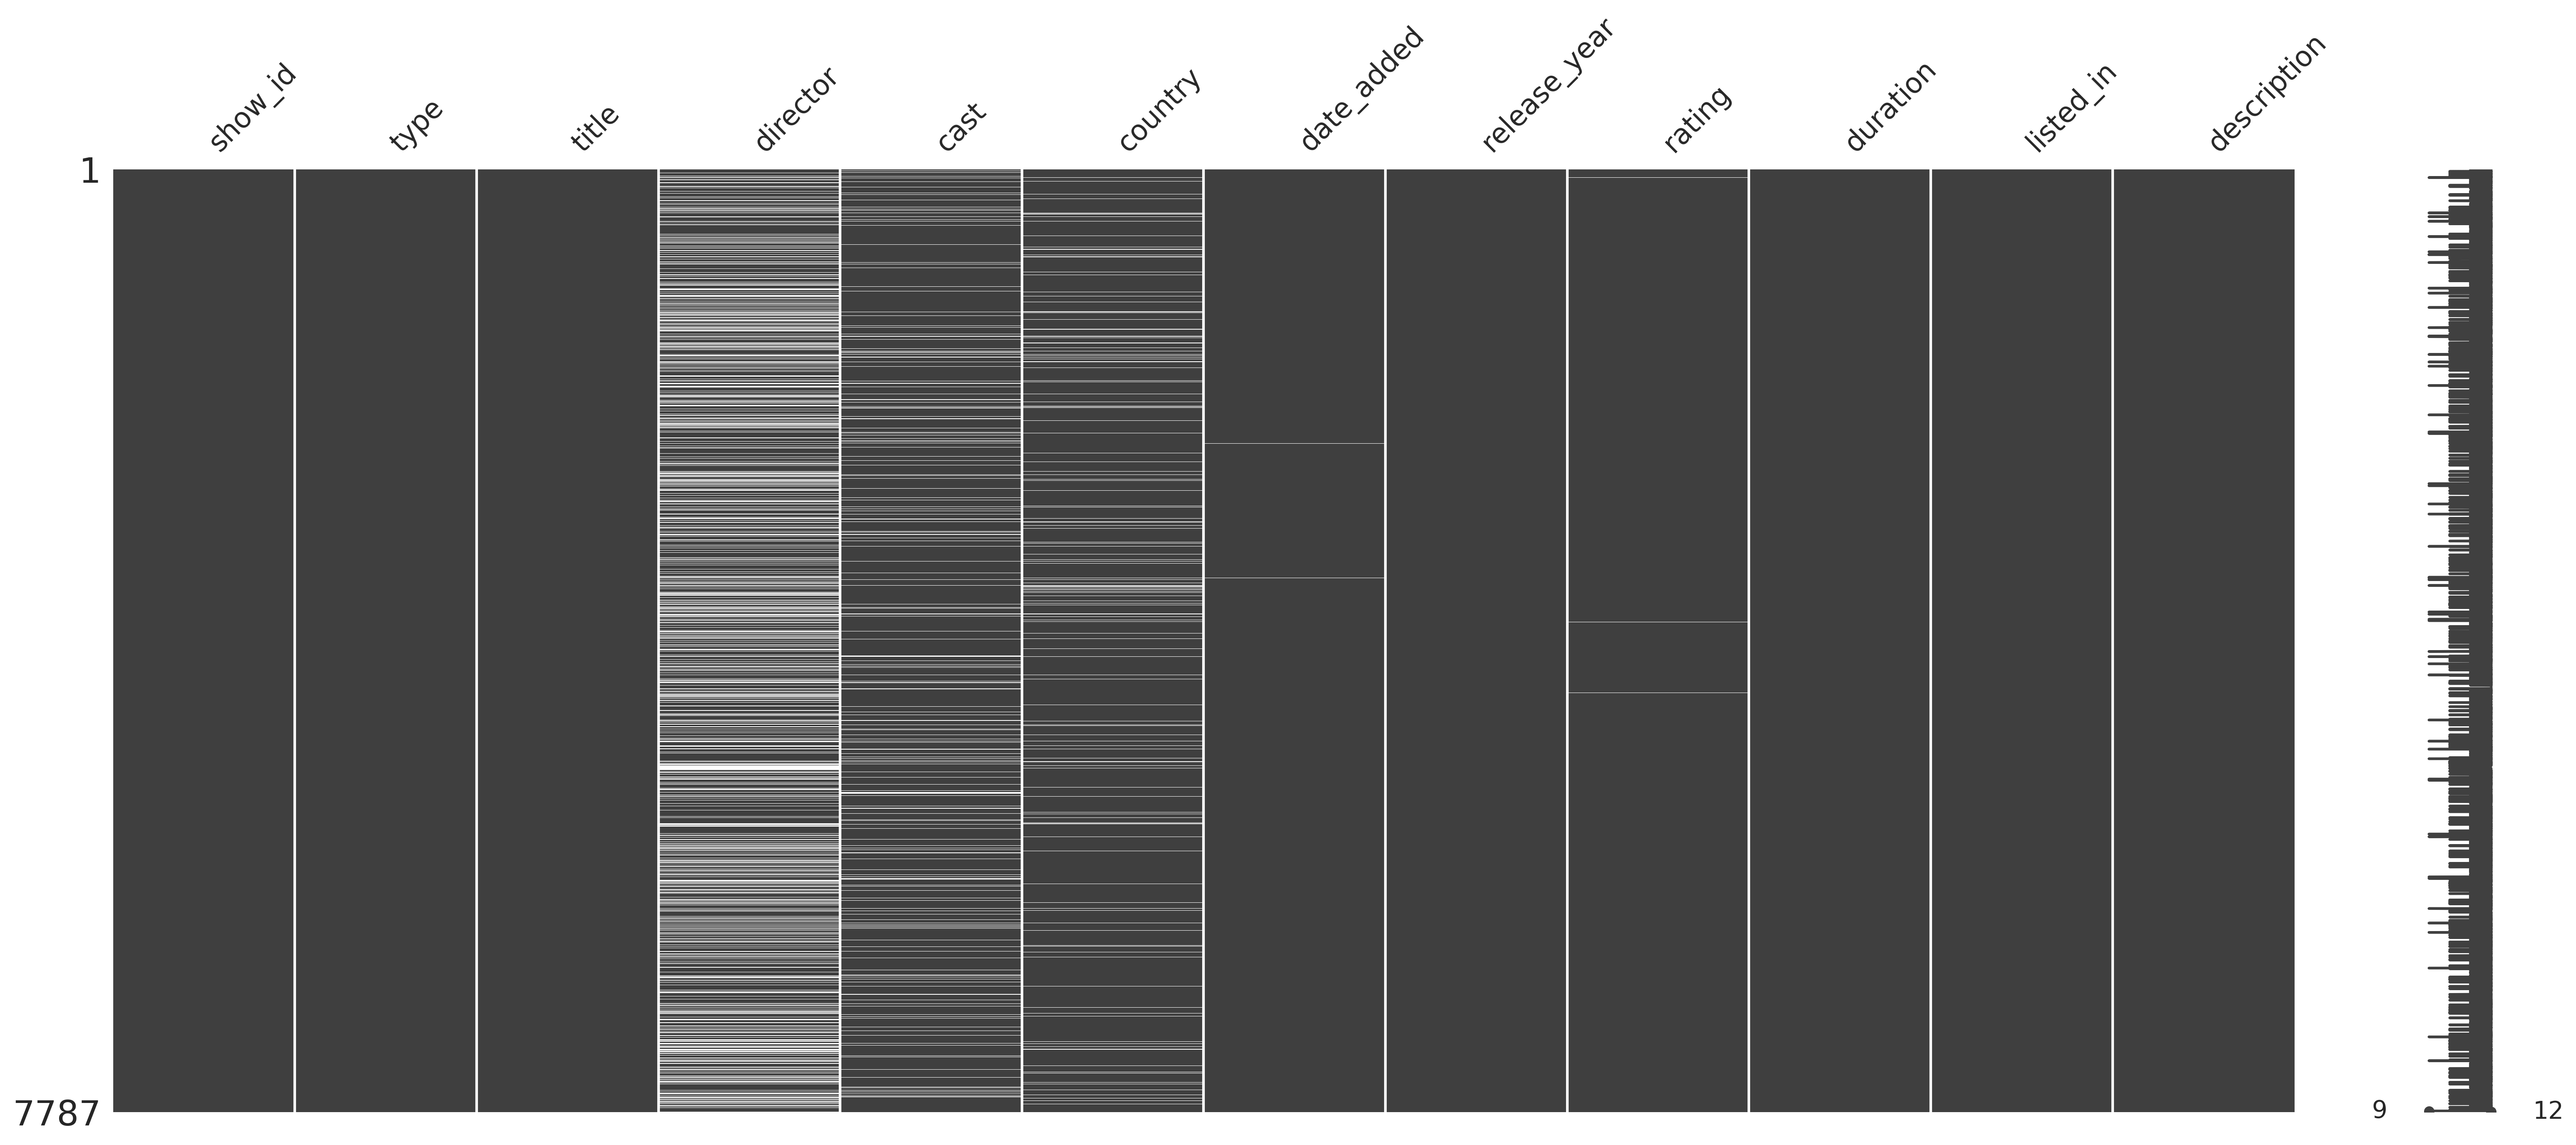

In [8]:
msno.matrix(netflix)
plt.show()

In [9]:
netflix = netflix.fillna('NULL')

In [11]:
netflix['year_added'] = netflix['date_added'].apply(lambda x : x.split(',')[-1])
netflix['year_added'] = netflix['year_added'].apply(lambda x : x if x != 'NULL' else '2020')
netflix['year_added'] = netflix['year_added'].apply(int)

In [13]:
netflix['year_added']

0       2020
1       2016
2       2018
3       2017
4       2020
        ... 
7782    2020
7783    2019
7784    2020
7785    2020
7786    2020
Name: year_added, Length: 7787, dtype: int64

In [14]:
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,TV Show,3%,NULL,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019
7784,s7785,Movie,Zulu Man in Japan,NULL,Nasty C,NULL,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020
7785,s7786,TV Show,Zumbo's Just Desserts,NULL,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020


Analisis film dan tv show

In [16]:
movie = netflix[netflix['type'] == 'Movie']
tv_show = netflix[netflix['type'] == 'TV Show']

In [17]:
movie.shape

(5377, 13)

In [18]:
tv_show.shape

(2410, 13)

Negara yang banyak memiliki film atau pun tv show

In [20]:
from collections import Counter

country_netflix = netflix['country']
country_counting = pd.Series(dict(Counter(','.join(country_netflix).replace(',',',').replace(', ',',').split(','))))
country_counting = country_counting.sort_values(ascending = False)
country_counting.drop(['NULL'], axis = 0, inplace = True)

In [21]:
total = sum(country_counting)
top_20 = sum(country_counting[:20])

print(total)
print(top_20)

9067
7879


In [22]:
top_20_country = country_counting[:20]

Visualisasi data dengan bar plot dan pie plot

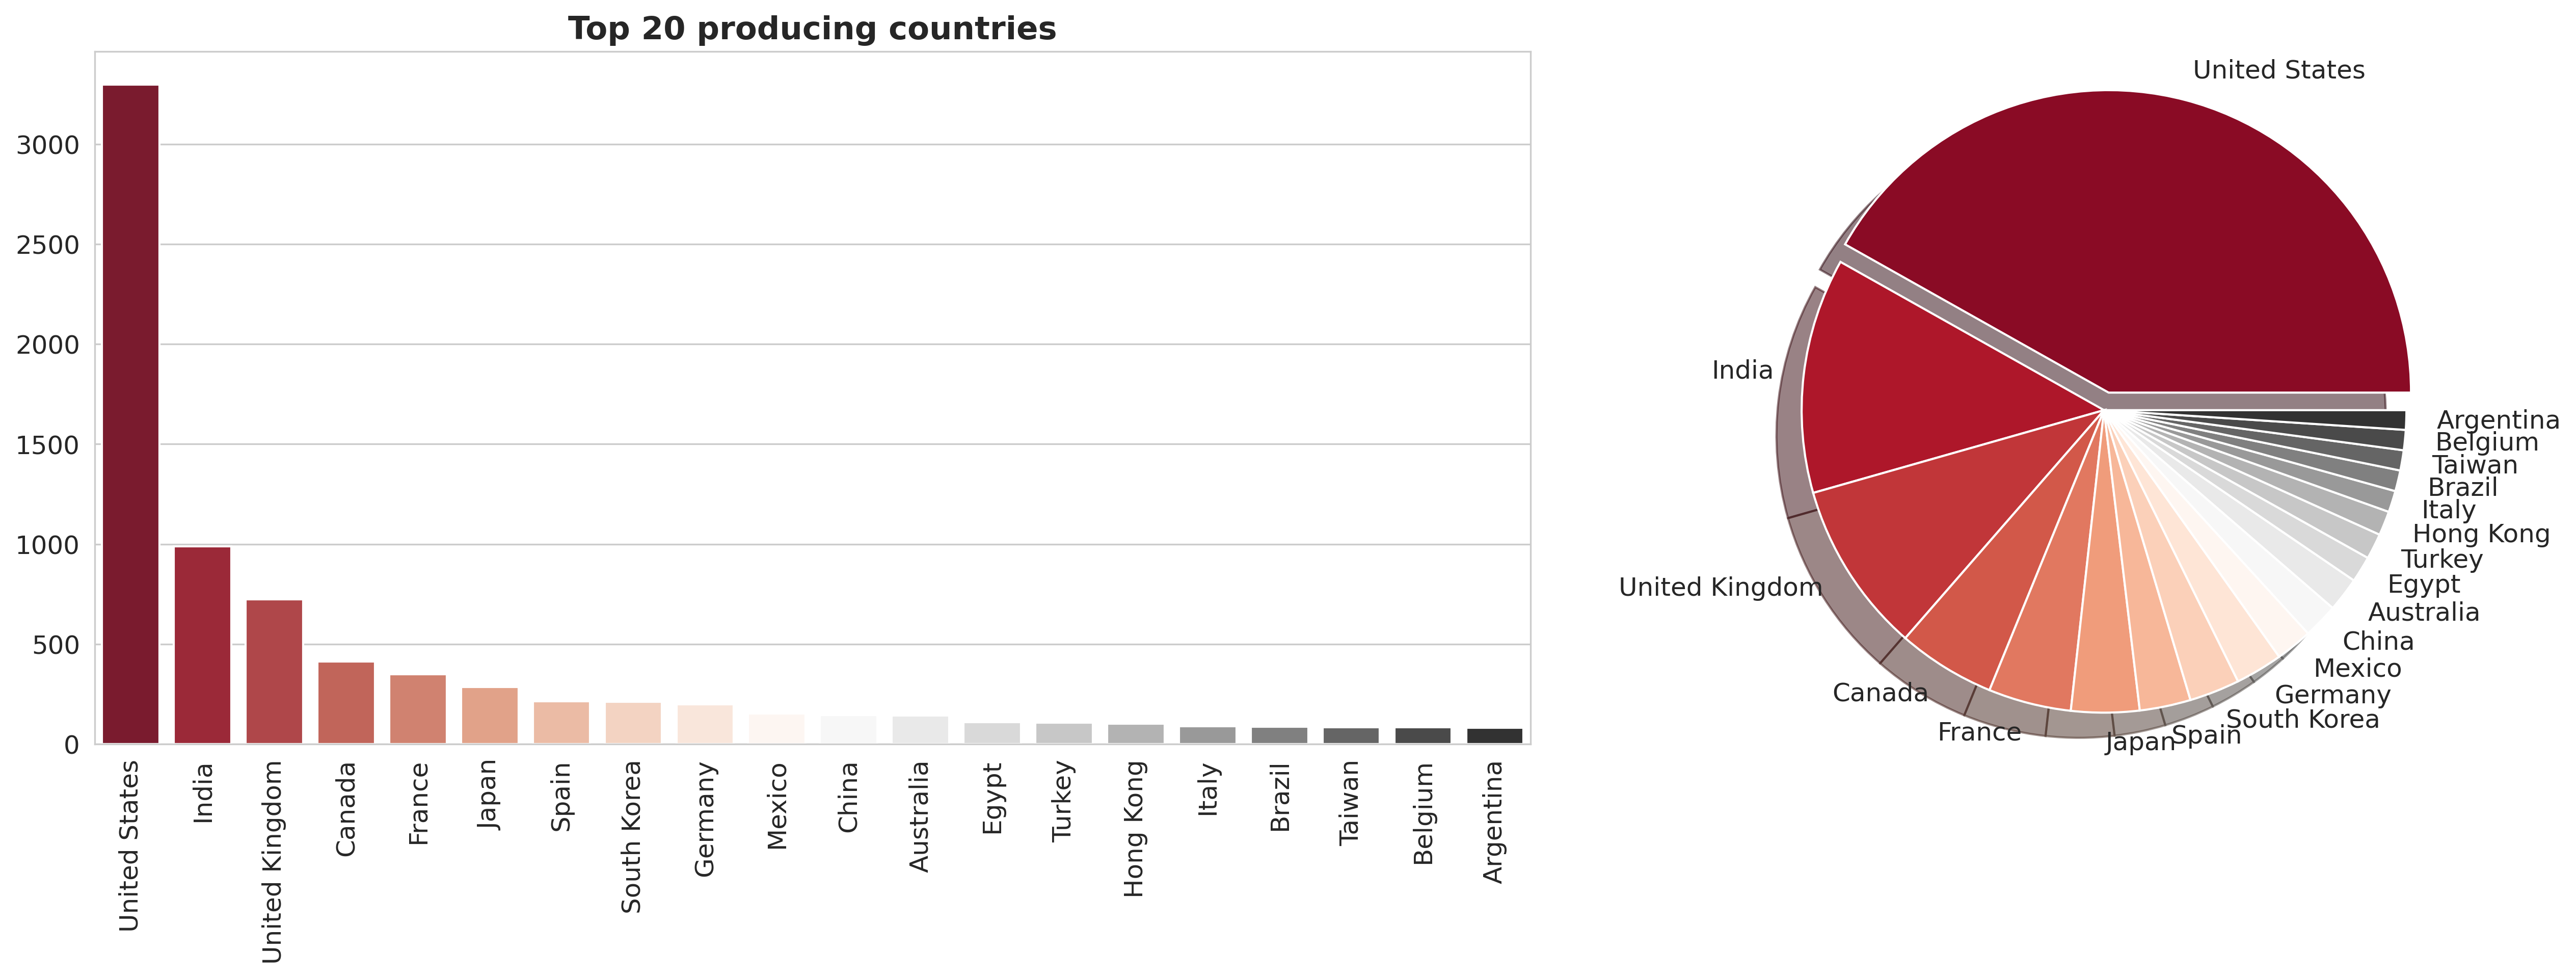

In [23]:
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 6))
gs = gridspec.GridSpec(nrows=1, ncols=2,
                       height_ratios=[6], 
                       width_ratios=[10, 5])

ax = plt.subplot(gs[0])
sns.barplot(top_20_country.index, top_20_country, ax=ax, palette="RdGy")
ax.set_xticklabels(top_20_country.index, rotation='90')
ax.set_title('Top 20 producing countries', fontsize=15, fontweight='bold')

explode = [0 for _ in range(20)]
explode[0] = 0.06

ax2 = plt.subplot(gs[1])
ax2.pie(top_20_country, labels=top_20_country.index,
        shadow=True, startangle=0, explode=explode,
        colors=sns.color_palette("RdGy", n_colors=20)
       )
ax2.axis('equal') 

plt.show()

Visualisasi data dengan treemap

In [26]:
from sklearn.preprocessing import MultiLabelBinarizer

def relation_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x : x.replace(' ,',',').replace(', ',',').split(','))
    types = []
    
    for i in df['genre']: types += i
    
    types = set(types)
    test = df['genre']
    mlb = MultiLabelBinarizer()
    
    res = pd.DataFrame(mlb.fit_transform(test),
                      columns = mlb.classes_,
                      index = test.index)
    
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize = (15,14))    
    pl = sns.heatmap(corr,
                     mask = mask,
                     cmap = "coolwarm",
                     vmax = .5,
                     vmin = -.5,
                     center = 0,
                     square = True,
                     linewidths = .7,
                     cbar_kws={"shrink" : 0.6}
                    )
    plt.show()

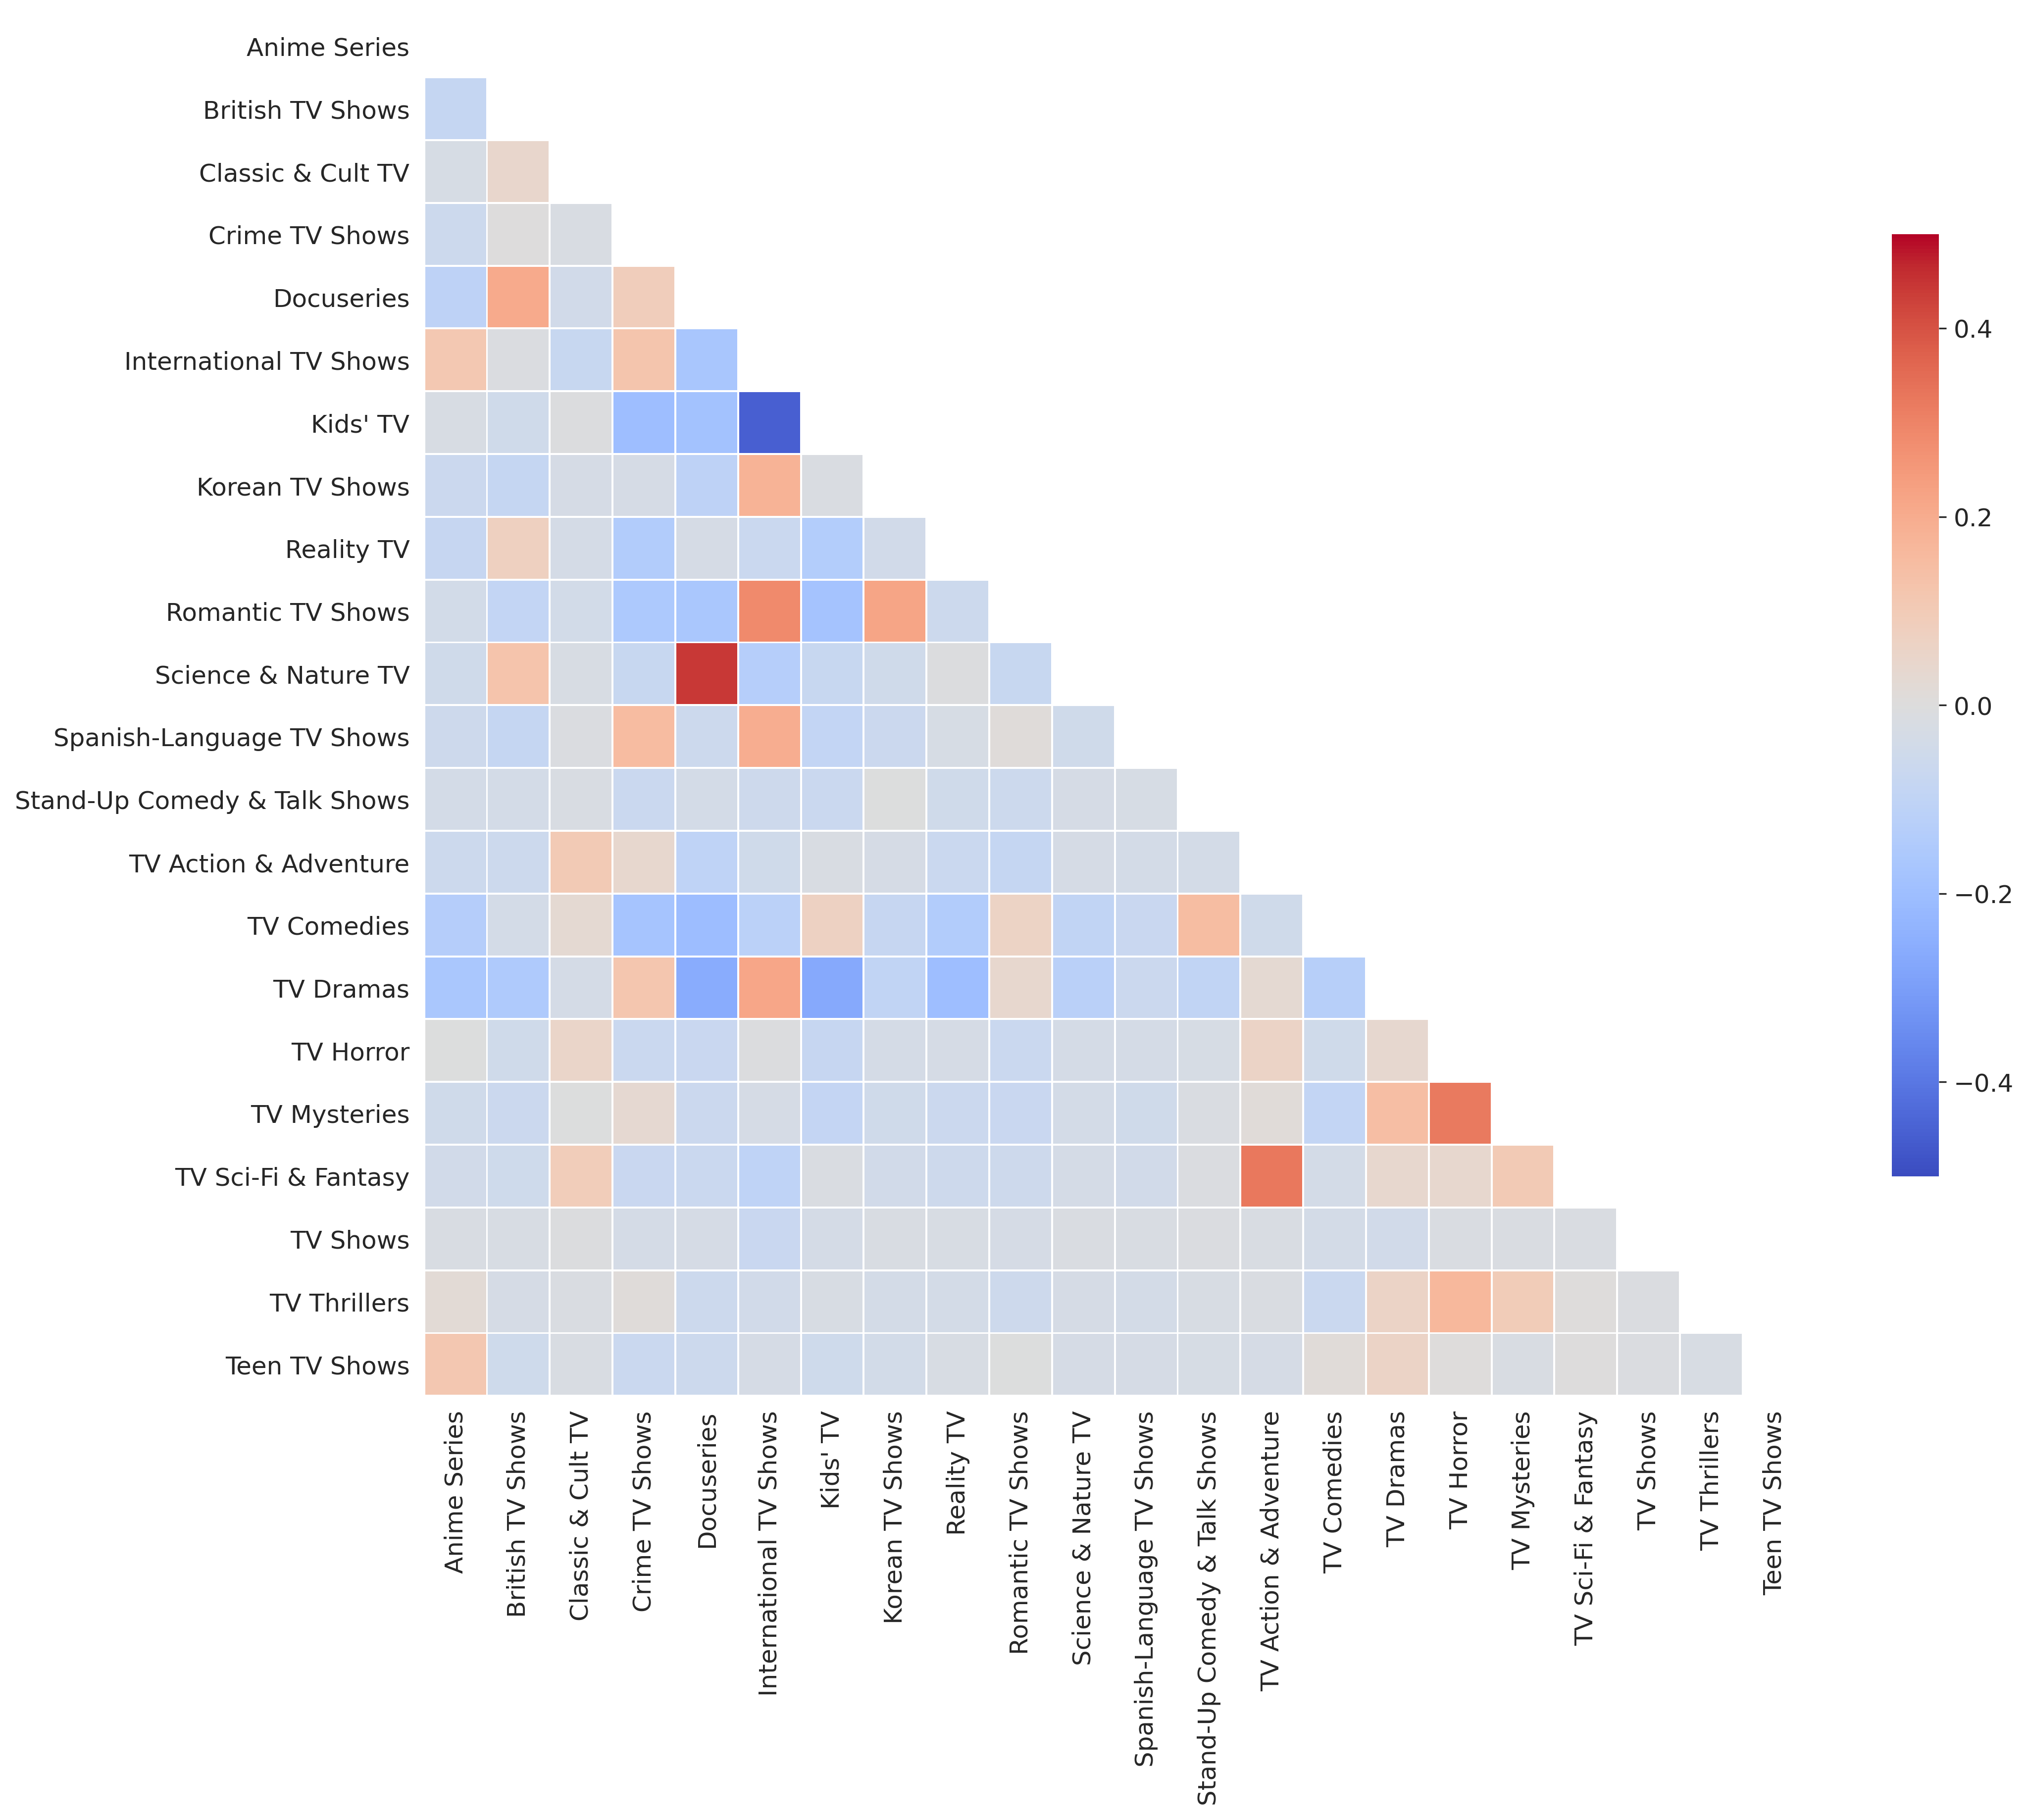

In [28]:
relation_heatmap(tv_show, "TV Show")

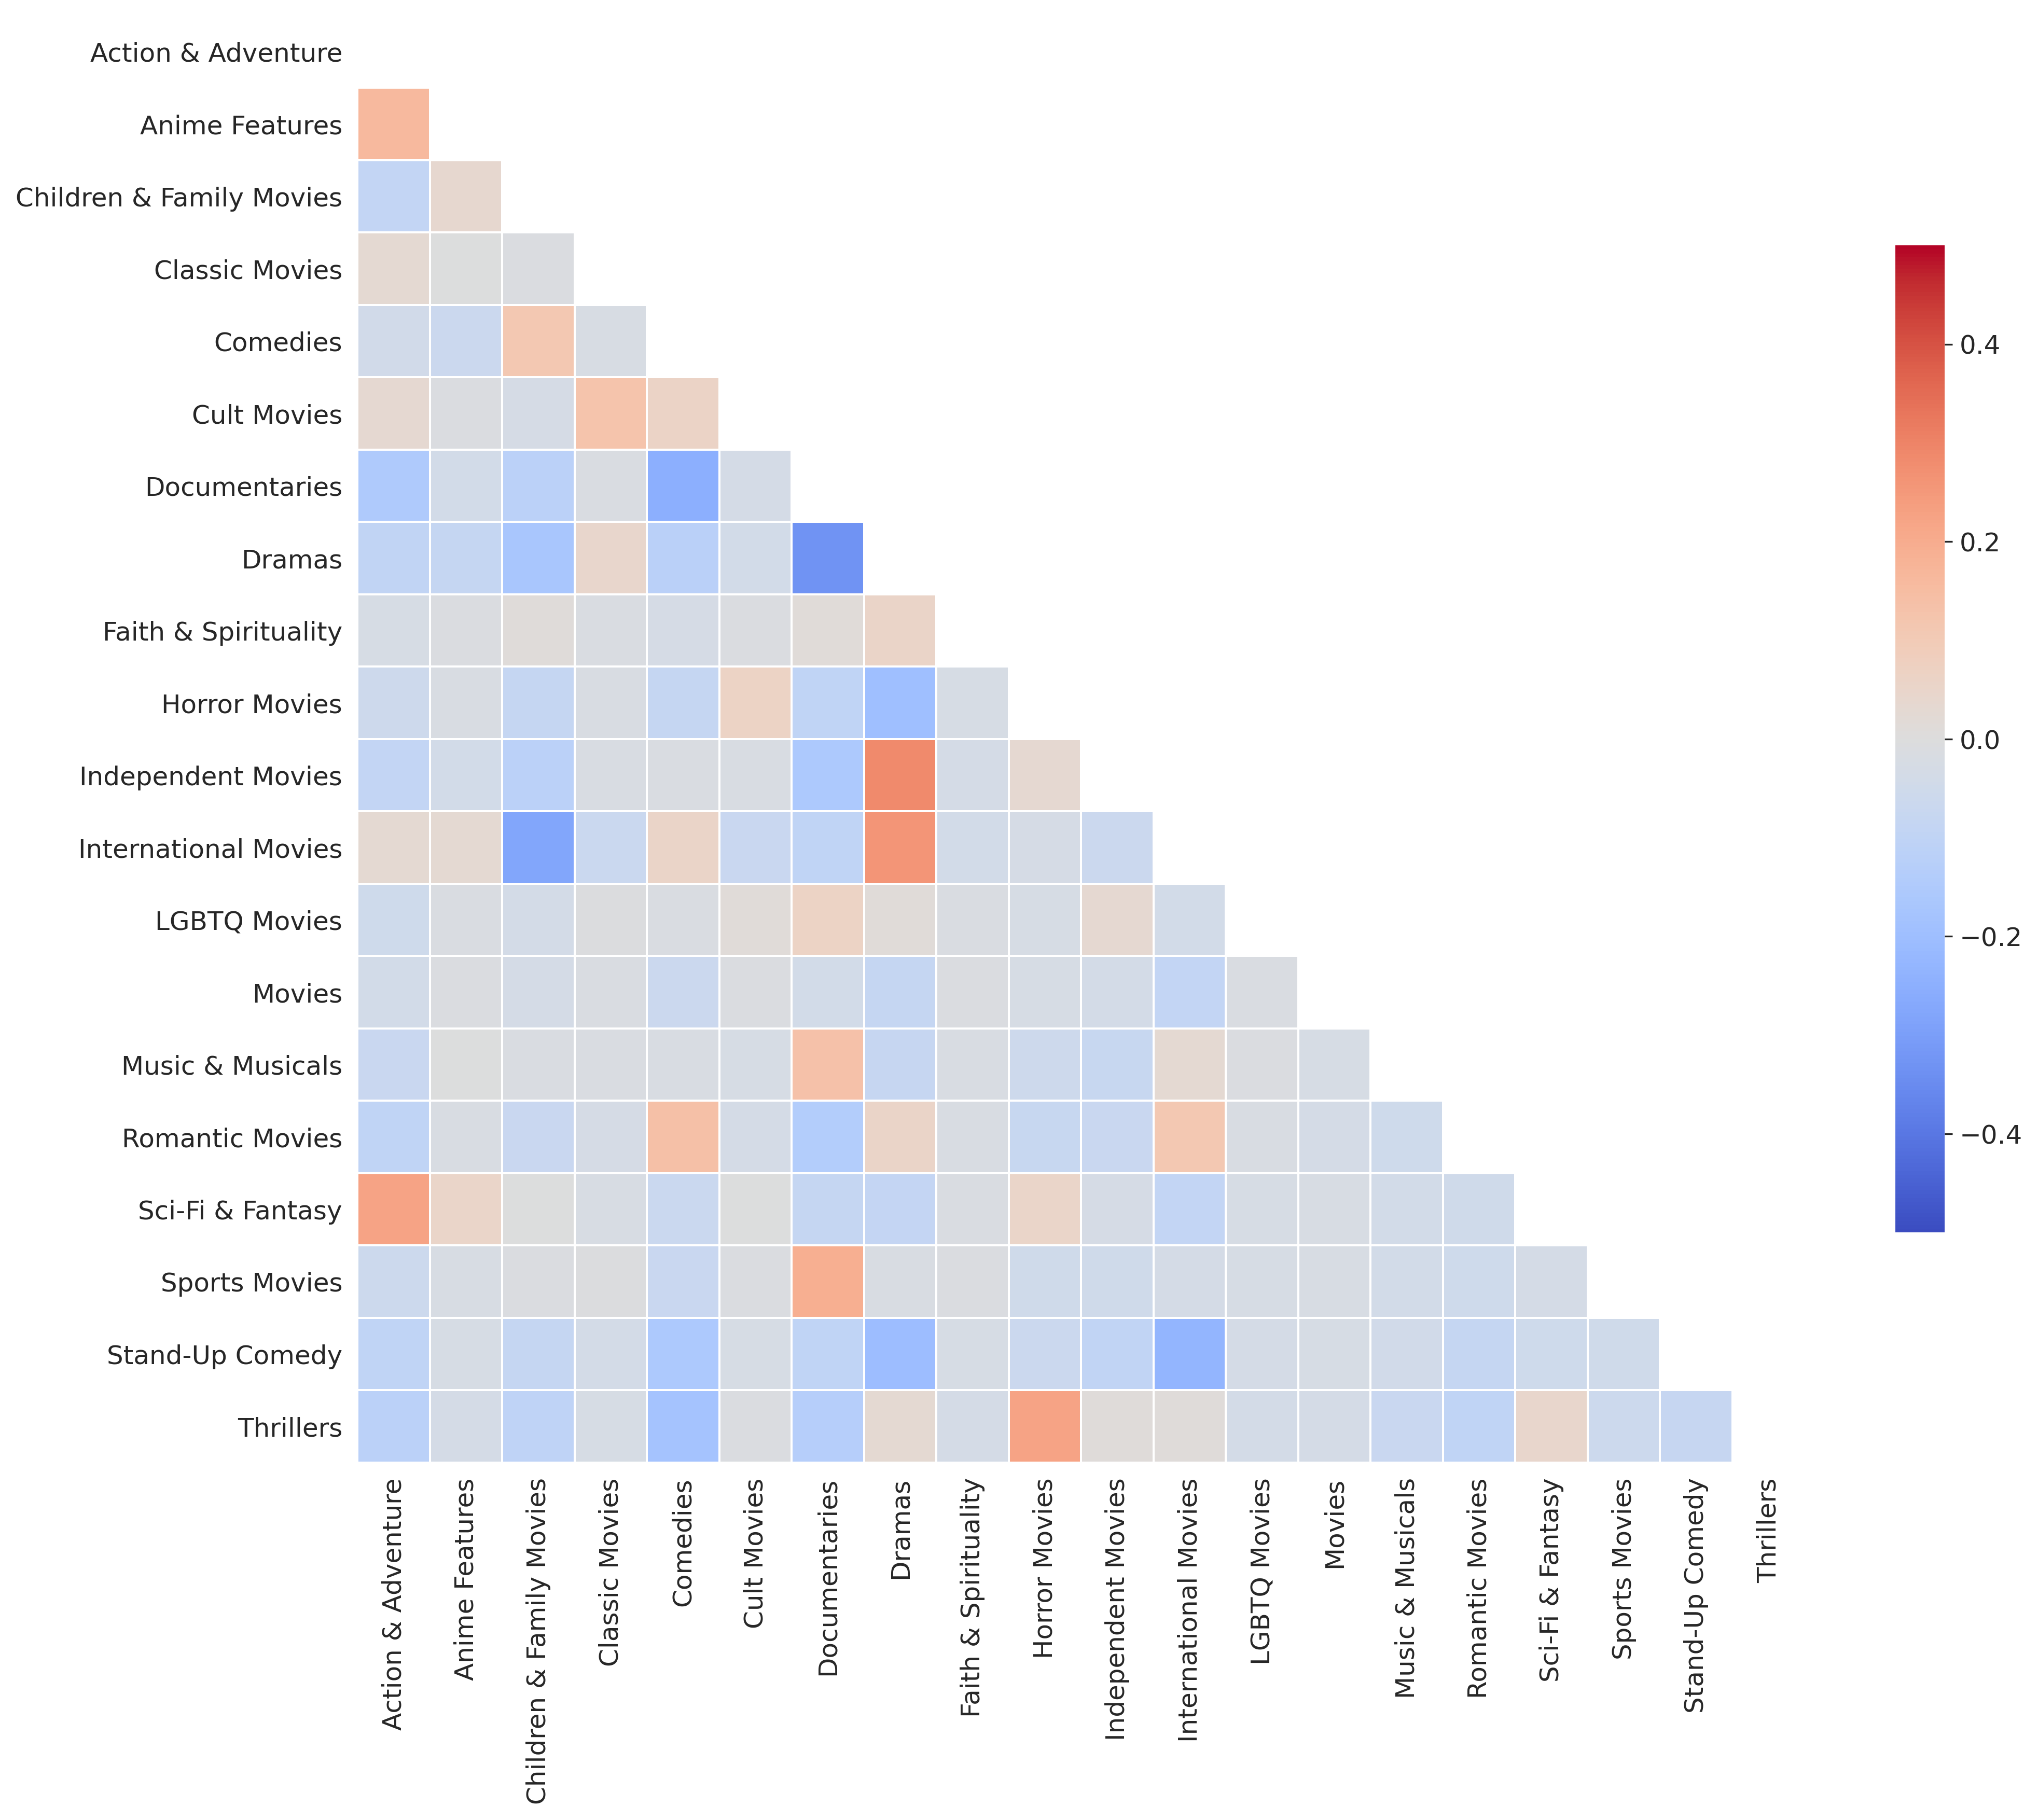

In [29]:
relation_heatmap(movie, "Movie")

Visualisasi data rating dalam barplot

In [32]:
rating_order = ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']

movie_rating = movie['rating'].value_counts()[rating_order]

In [33]:
movie_rating

G             39
TV-Y         117
TV-G         111
PG           247
TV-Y7         95
TV-Y7-FV       5
TV-PG        505
PG-13        386
TV-14       1272
R            663
NC-17          3
TV-MA       1845
Name: rating, dtype: int64

In [30]:
def rating_barplot(data, title, height, h_lim = None):
    fig, ax = plt.subplots(1,1, figsize = (20, 10))
    if h_lim : ax.set_ylim(0, hlim)
        
    ax.bar(data.index,
          data,
          color = "#d0d0d0",
          width = 0.6,
          edgecolor = 'black')
    color = ['green', 'blue', 'orange', 'red']
    span_range = [[0,2], [3,6], [7,8], [9,11]]
    
    for idx, sub_title in enumerate(['Anak kecil', 'Anak agak besar', 'Remaja', 'Dewasa']):
        ax.annotate(sub_title,
                    xy = (sum(span_range[idx])/2, height),
                    xytext = (0,0),
                    textcoords = 'offset points',
                    va = "center",
                    ha = "center",
                    color = "w",
                    fontsize = 16,
                    fontweight = 'bold',
                    bbox = dict(boxstyle = 'round4',
                                pad = 0.4,
                                color = color[idx],
                                alpha = 0.6))
                    
        ax.axvspan(span_range[idx][0]-0.4,
                   span_range[idx][1]+0.4,
                   color = color[idx],
                   alpha = 0.1)
    
    plt.show()

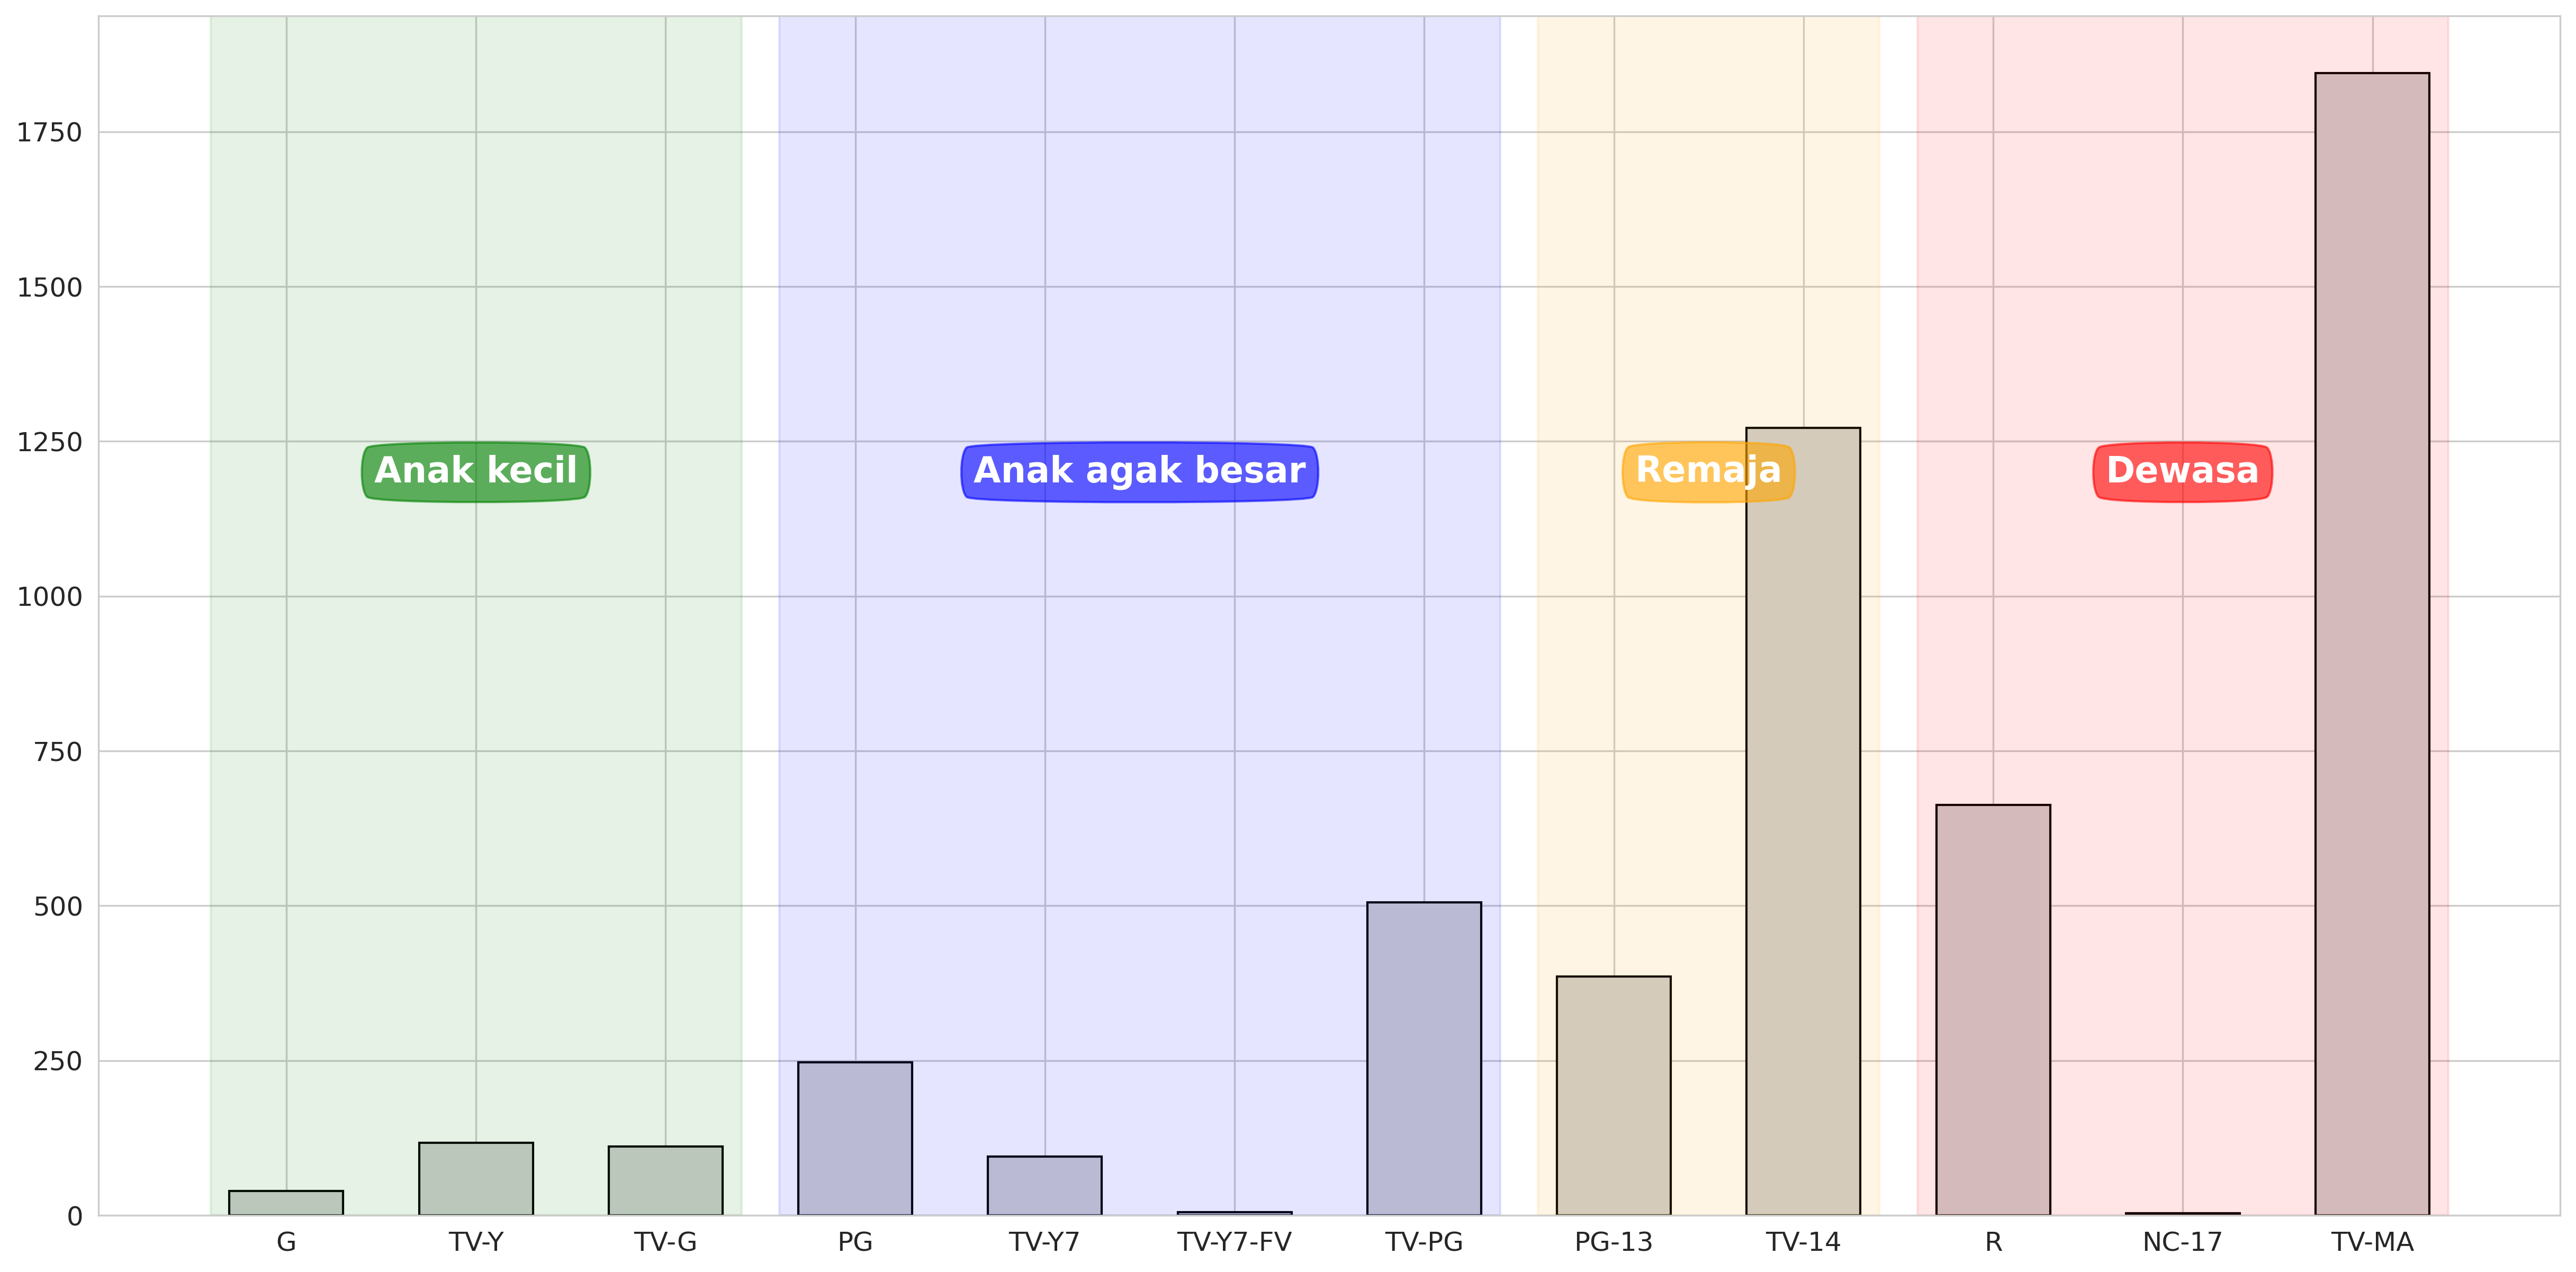

In [34]:
rating_barplot(movie_rating, "Movie", 1200)